In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

STA365 HW1


Author1: Yuchen Hua 1008307921


Author2: Hao Ni, 1008283457

In [2]:
class game:
    prob:float              #  The probablity of the winning the game.
    post:tuple[int, int]    #  The parameter of the beta distribution (alpha,beta) and the both two int should be positive
    times:int               #  The times of the game have played in the each game.


    def __init__(self,post:tuple=(1,1),prob:float = None):
        # If not given the probablility, set a random probability, otherwise use the given one.
        if prob == None:
            self.prob = stats.uniform(0,1).rvs(size=1)[0]
        else:
            self.prob = prob
        #Set the posterior disteribution if given prior beta distribution, otherise put the (alpha,beta)=(1,1)
        self.post = post
        #Set the played times as it should follow its beta posterior distribution.
        self.times = post[0]+post[1]-2
        


In [3]:
class baysian_bandit:
    gamelist:list[game]         # Put the game into the a list to simplify the process.

    def __init__(self,gamelist):
        #Add a copy of the original game list
        self.gamelist = gamelist[:]

    def find_game_to_play(self):
        #generate a empty list to compare the random beta varibale.
        betalist = []
        #put the beta random varible inside with the same order of the gamelist.
        for game in self.gamelist:
            betalist.append(stats.beta.rvs(*game.post)) 
        #return the index of the largest beta varible so that we can trace back to the orginal game which we should play.
        return np.argmax(betalist)
    
    def simulate_result(self, game):
        #simulate the game with the winning probability
        return stats.bernoulli(p=game.prob).rvs(size = 1)[0]
    
    def update_post(self, i,result):
        # update the posterior distribution with the given information
        self.gamelist[i].post = (self.gamelist[i].post[0]+result, self.gamelist[i].post[1] + 1 - result)
    
    def play_game_once(self):
        # the things that we need to do intotal after the game played once
        i = self.find_game_to_play()
        result = self.simulate_result(self.gamelist[i])
        self.gamelist[i].times += 1
        self.update_post(i,result)
    # We put
    def baysian_bandit_simulation(self,num):
        # We do 'nums' times simultion and get the final result after the final 
        nums_played =[]
        average_esti = []
        for _ in range(num):
            self.play_game_once()
        # print all the games played in the order of the gamelist
        for games in self.gamelist:
            nums_played.append(games.times)
        max_index = np.argmax(nums_played)
        num = stats.beta.mean(a=self.gamelist[max_index].post[0],b=self.gamelist[max_index].post[1],loc=0, scale=1)
        num = num.round(5)
        print(nums_played)
        print(f'I should play #{max_index+1} Game because it has the highest probability to win, with the estimated probability around {num}.')
        

    
    def plot_final_graph(self):
        # Define the range of x values
        x = np.linspace(0.001, 1, 10000)
        para = []
        for game in self.gamelist:
            para.append(game.post)
        for i in range(len(self.gamelist)):
            """ #i in the legend means the number of the game played and I show the exact winning probablity 
            versus the graph here because some of the selp probability is random """
            print(f"The #{i+1} game has the exact winning prob {self.gamelist[i].prob}")
            plt.plot(x, stats.beta(*para[i]).pdf(x), label = f"#{i+1}")
        # Add a title and labels
        plt.title('Plot of Beta Distributions')
        plt.xlabel('x')
        plt.ylabel('y')
        # Add a legend
        plt.legend()
        # Show the plot
        plt.show()


In [7]:
# for this exact question, I generate 3 games in the gamelist
HW_game1 = game(prob=0.25)
HW_game2 = game(prob=0.5)
HW_game3 = game(prob=0.75)
play_hw = baysian_bandit([HW_game1,HW_game2,HW_game3])
play_hw.baysian_bandit_simulation(1000)

[17, 6, 977]
I should play #3 Game because it has the highest probability to win, with the estimated probability around 0.77017.


The outcome above shows that we should play the third game which is exactly the hw_game3 and with an estimated winning probablity.

The #1 game has the exact winning prob 0.25
The #2 game has the exact winning prob 0.5
The #3 game has the exact winning prob 0.75


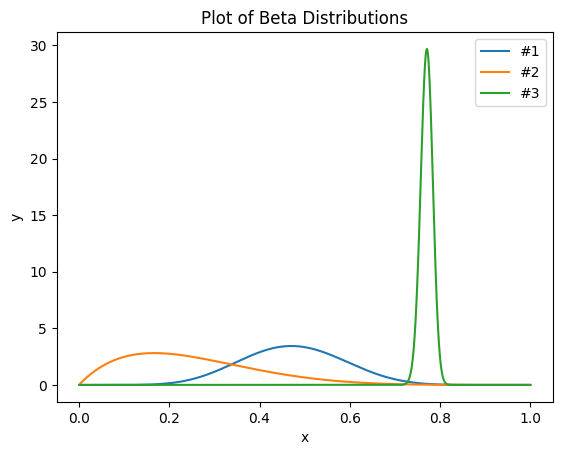

In [8]:
#give the plot and compare with the original probability
play_hw.plot_final_graph()

Compared to the true probabilities, I found that the probabilities estimated by my algorithm were close to the exact probabilities of the top games. This seems to be a good algorithm.

In the code below, I'm giving the probabilities for different scenarios, which also gives me the exact answer.

[52, 11, 36, 5]
I should play #1 Game because it has the highest probability to win, with the probability around 0.62963.
The #1 game has the exact winning prob 0.6
The #2 game has the exact winning prob 0.2
The #3 game has the exact winning prob 0.598199907282712
The #4 game has the exact winning prob 0.04105557744668675


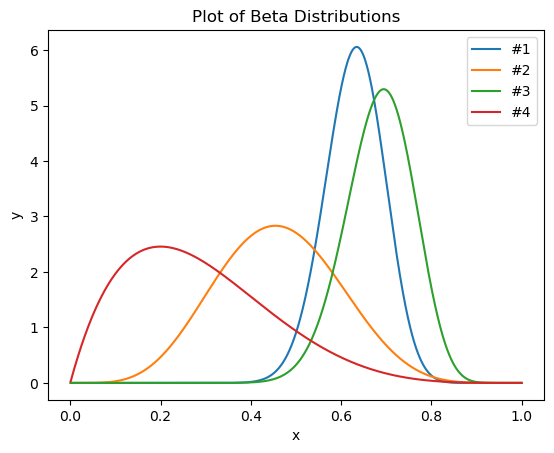

In [6]:
#I randomly choose four games with 4 given situations:
# Given probablilty together with the prior beta distribution(may be tested by others,and we include this trials into the total number of the trials)
# Given probablilty with unknown prior distribution
# Unknown probability with given prior distributiion(may be tested by others, and we include this trials into the total number of the trials)
# Unknown probability and prior distebution
# You can add games by adding games in the game list.
# if you need to change the game with only given probability, you need to type 'game(prob=p)' where p is a number between(0,1) that you need to set fot the game.
plays = baysian_bandit([game(prob=0.6), game((4,1),0.2),game(),game((2,1))])
#We simulate it with 100 number of times
plays.baysian_bandit_simulation(100)
#Plot the final graph and write down and compare with the orignal probability.
plays.plot_final_graph()


In conclusion, my algrithom would give me which game to play even with some known prior distribution. And we can find the highest probability game with its estimated probability.